# Lab | Revisiting Machine Learning Case Study

Complete the following steps on the categorical columns in the dataset:

Check for null values in all the columns

Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories
ZIP CODE - we are including state already
Identify columns that over 85% missing values

Remove those columns from the dataframe

Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

Note that there are a few null values in the column. We will first replace those null values using the code below:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('learningSet.csv')

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_5875/3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


## Check for null values in all the columns

In [3]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index() # fraction of null values
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [4]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(50)

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
29,MBGARDEN,0.553955
30,MBBOOKS,0.553955
31,MBCOLECT,0.554584
32,MAGFAML,0.553955
33,MAGFEM,0.553955


In [5]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].tail(50)

,column_name,nulls_percentage
382,ADATE_23,0.589758
383,ADATE_24,0.387509
412,RDATE_3,0.997464
413,RDATE_4,0.997055
414,RDATE_5,0.999906
415,RDATE_6,0.991867
416,RDATE_7,0.906773
417,RDATE_8,0.774955
418,RDATE_9,0.824613
419,RDATE_10,0.890360


## Exclude the OSOURCE and ZIP variables

## Identify columns that over 85% missing values

In [6]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.85]
columns_above_threshold['column_name']

23      NUMCHLD
412     RDATE_3
413     RDATE_4
414     RDATE_5
415     RDATE_6
416     RDATE_7
419    RDATE_10
422    RDATE_13
424    RDATE_15
426    RDATE_17
429    RDATE_20
430    RDATE_21
432    RDATE_23
434     RAMNT_3
435     RAMNT_4
436     RAMNT_5
437     RAMNT_6
438     RAMNT_7
441    RAMNT_10
444    RAMNT_13
446    RAMNT_15
448    RAMNT_17
451    RAMNT_20
452    RAMNT_21
454    RAMNT_23
Name: column_name, dtype: object

In [7]:
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [8]:
drop_list = list(columns_above_threshold['column_name'])
print(drop_list)

['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23']


In [9]:
for i in ['OSOURCE','ZIP']:
    drop_list.remove(i)
print(drop_list)

# There is error here. Because drop_list list does not have 'OSOURCE','ZIP' columns.
# That's why we can not drop (exclude) them from the list.

ValueError: list.remove(x): x not in list

## Remove those columns from the dataframe

In [ ]:
data = data.drop(drop_list,axis=1)
data

## Reduce the number of categories in the column GENDER.

In [14]:
df = pd.DataFrame(categorical['GENDER'].value_counts()).reset_index()
df

,index,GENDER
0,F,51277
1,M,39094
2,,2957
3,U,1715
4,J,365
5,C,2
6,A,2


In [15]:
print(categorical['GENDER'].value_counts())

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [16]:
categorical['GENDER'].dtypes

dtype('O')

In [17]:
# categorical['GENDER'] = categorical['GENDER'].apply(lambda x: x.replace(" ", np.NaN)) 

In [18]:
categorical['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [19]:
categorical['GENDER'].isna().sum()

0

In [20]:
print(categorical['GENDER'].value_counts())
categorical['GENDER'] = categorical['GENDER'].fillna('F')

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [21]:
df.columns = ['gender', 'count']
other_genders = list(df[df['count']<35000]['gender'])

def clean_gender(x):
    if x in other_genders:
        return 'other'
    else:
        return x
    
categorical['GENDER'] = list(map(clean_gender, categorical['GENDER']))


In [22]:
categorical['GENDER'].value_counts()

F        51277
M        39094
other     5041
Name: GENDER, dtype: int64

# Lab | Feature engineering

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

Check for null values in the numerical columns.
Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
Use appropriate EDA technique where ever necessary.

In [23]:
numerical = data.select_dtypes(np.number) # numerical dataframe of data

In [24]:
# fraction of null values in columns of numerical dataframe
nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index() 
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,INCOME,0.223096
...,...,...
377,TARGET_B,0.000000
378,TARGET_D,0.000000
379,HPHONE_D,0.000000
380,RFA_2F,0.000000


In [25]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(50)

,column_name,nulls_percentage
3,AGE,0.248030
4,INCOME,0.223096
5,WEALTH1,0.468830
7,MBCRAFT,0.553955
8,MBGARDEN,0.553955
9,MBBOOKS,0.553955
10,MBCOLECT,0.554584
11,MAGFAML,0.553955
12,MAGFEM,0.553955
13,MAGMALE,0.553955


In [26]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].tail(50)

,column_name,nulls_percentage
20,PUBOPP,0.553955
28,WEALTH2,0.459303
149,MSA,0.001383
150,ADI,0.001383
151,DMA,0.001383
316,ADATE_3,0.020438
317,ADATE_4,0.022964
318,ADATE_5,0.352052
319,ADATE_6,0.037280
320,ADATE_7,0.093007


## Wealth1 column

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WEALTH1', ylabel='Density'>

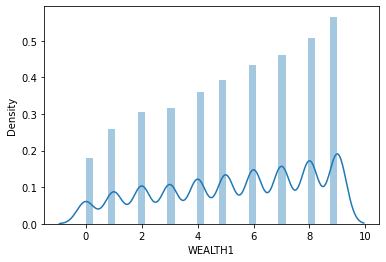

In [27]:
sns.distplot(numerical['WEALTH1'])

In [28]:
numerical['WEALTH1'].value_counts(dropna=False) # wealth rating

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [29]:
numerical['WEALTH1'].dtypes

dtype('float64')

In [30]:
numerical['WEALTH1'].mean()

5.345698500394633

In [31]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(5.0)

# replace NaNs with the closest value to mean.

In [32]:
numerical['WEALTH1'].value_counts(dropna=False)

5.0    50012
9.0     7585
8.0     6793
7.0     6198
6.0     5825
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

## ADI column

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ADI', ylabel='Density'>

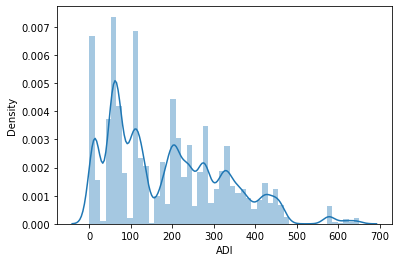

In [33]:
sns.distplot(numerical['ADI'])

In [34]:
numerical['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [35]:
numerical['ADI'].isna().sum()

132

In [36]:
numerical['ADI'].dtypes

dtype('float64')

In [37]:
numerical['ADI'].mean()

187.35640218303945

In [38]:
numerical['ADI'] = numerical['ADI'].fillna(187)

# replace NaNs with the closest value to mean.

In [39]:
numerical['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

## GEOCODE2 column

In [42]:
data['GEOCODE2'].dtypes # GEOCODE2 column does not belong to numerical dataframe. 
# data types are object.

dtype('O')

In [43]:
data['GEOCODE2'].head(10) # Country size code

0    C
1    A
2    C
3    C
4    A
5    C
6    D
7    C
8    D
9    B
Name: GEOCODE2, dtype: object

In [44]:
data['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [45]:
data['GEOCODE2'].isna().sum() # There are 132 NaN values in GEOCODE2 column.

132

In [46]:
# the apply lambda does not work for me. Any suggestion?

# data['GEOCODE2'] = data['GEOCODE2'].apply(lambda x: x.replace(" ", "A"))

# replace spaces with the most frequent value (A)

In [47]:
# data['GEOCODE2'] = data['GEOCODE2'].fillna('A') # replace spaces with the most frequent value (A)

In [48]:
# data['GEOCODE2'].value_counts()

In [49]:
# data['GEOCODE2'] = data['GEOCODE2'].replace(r'^\s*$', np.nan, regex=True)

data['GEOCODE2'] = data['GEOCODE2'].replace(r'^\s*$', 'A', regex=True)

# replace spaces with the most frequent value (A)

In [50]:
data['GEOCODE2'].value_counts(dropna=False)

A      34671
B      28505
D      16580
C      15524
NaN      132
Name: GEOCODE2, dtype: int64

In [51]:
data['GEOCODE2'] = data['GEOCODE2'].replace(np.nan, 'A', regex=True)
# replace spaces with the most frequent value (A)

In [52]:
data['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

## DMA column

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DMA', ylabel='Density'>

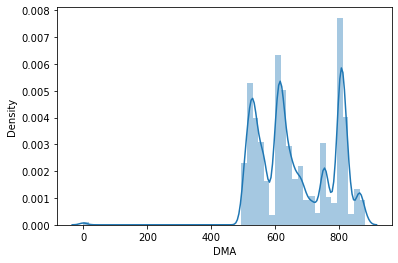

In [53]:
sns.distplot(numerical['DMA'])

In [54]:
numerical['DMA'].dtypes 

dtype('float64')

In [55]:
numerical['DMA'].head(10) # Country size code

0    682.0
1    803.0
2    518.0
3    862.0
4    528.0
5    691.0
6    509.0
7    643.0
8    624.0
9    659.0
Name: DMA, dtype: float64

In [56]:
numerical['DMA'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [57]:
numerical['DMA'].isna().sum() # There are 132 NaN values in DMA column.

132

In [58]:
numerical['DMA'].mean()

664.0040722082284

In [59]:
numerical['DMA'] = numerical['DMA'].replace(np.nan, 664, regex=True)

# replace NaNs with the closest value to the mean value of column

In [60]:
numerical['DMA'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [61]:
numerical['DMA'].isna().sum()

0

## MSA column

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSA', ylabel='Density'>

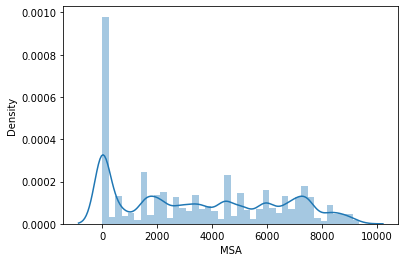

In [62]:
sns.distplot(numerical['MSA'])

In [63]:
numerical['MSA'].dtypes 

dtype('float64')

In [64]:
numerical['MSA'].head(10) # Country size code

0       0.0
1    4480.0
2       0.0
3    9340.0
4    5000.0
5    2030.0
6       0.0
7    3960.0
8       0.0
9    5360.0
Name: MSA, dtype: float64

In [65]:
numerical['MSA'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [66]:
# There 21333 0.0 values. They can be replaced with median to get rid of the effect of outliers.

In [67]:
numerical['MSA'].isna().sum() # There are 132 NaN values in MSA column.

132

In [68]:
numerical['MSA'].median()

3350.0

In [69]:
numerical['MSA'] = numerical['MSA'].replace(0.0, 3350.0, regex=True)

# replace spaces with median

In [70]:
numerical['MSA'].value_counts(dropna=False)

3350.0    21380
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
3200.0        1
9280.0        1
743.0         1
1480.0        1
8480.0        1
Name: MSA, Length: 298, dtype: int64